# Trends Visual of Wikipedia Web Traffic Forcasting
Lets import our packages and read the csv data through pandas

In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read in the dataframe from the csv file
file = "/Volumes/SD.Card/ML_Data/Web Traffic/web-traffic-time-series-forecasting/train_1.csv"
data = pd.read_csv(file)
df = data.copy(deep=True)

In [3]:
df = df.fillna(0) # fill na just for our intial look
df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


##### Lets start with the trends

The first thing we can take a look at is the stationality of our data. Stationality is the ... Lots of forcasting technique have been developed on stationary data, so checking and potentially modifying our data could result in better results. Stationality can be tested using an Adfuller test. An adfuller test can be used to test for a unit root in a univariate process in the presence of serial correlation. If the pvalue is above a critical size, then we cannot reject that there is a unit root.



In [4]:
# packages for investigating trends
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller

In [5]:
# lets grab a row from our data to run our tests on
# doing these test with multiple results can general the parameters we use
x = df[25:26].values[0][1:-1]
x = x.astype(int)

In [6]:
# removing nan's
x = x[~np.isnan(x)]
# adfuller test
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %E' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.510627
p-value: 1.975907E-06
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


Since our stationality check returns a low p-value we can reject the null hypothesis of non-staionailty.

Lets see what the trends, redisuals, and seasonlity are of the time series

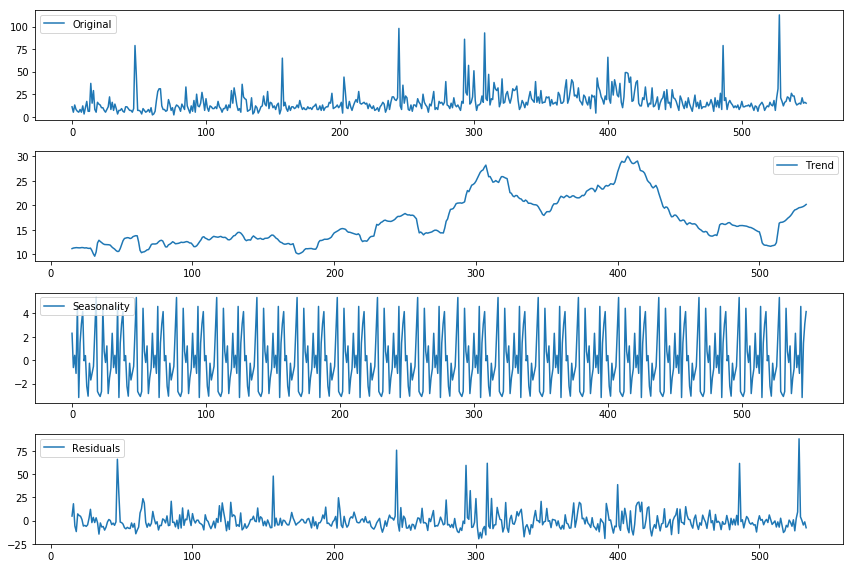

In [7]:
decomposition = seasonal_decompose(list(x), freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


We see there is no clear trend and repetative seasonailty. The residuals are modified values with the 'trend' and 'seasonality' taken out of the data. This values would produce the lowest stationlity check p values but arent needed in this case.

Next we can take a look at some datetime features that show daily, weekly, and monthly trends.

/Volumes/SD.Card/Anaconda/anaconda3/envs/DS/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


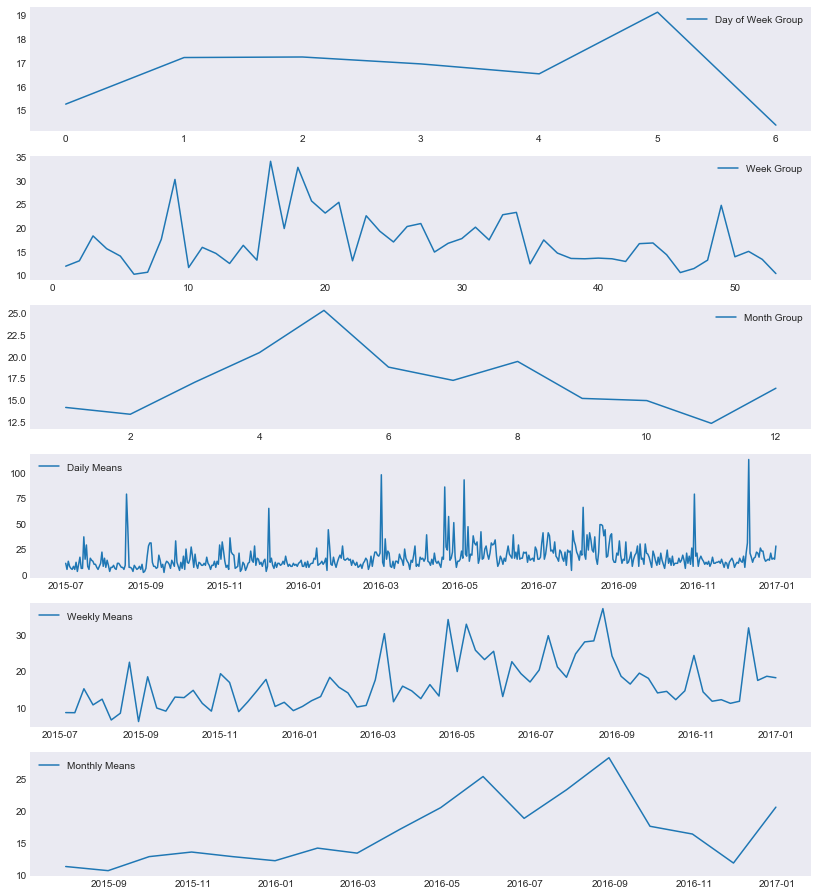

In [8]:
# tranpose dataframe to use groupby functionality
data = df.drop(columns='Page')
data = data.transpose()
data.index = pd.to_datetime(data.index)

# plot month, day, and time of week
fig = plt.figure(figsize=(14, 16))
fig.set_facecolor('white')
plt.style.use('seaborn-dark')

# make weekly and monthly column so we can groupby and plot
data['month'] = data.index.month
data['day of week'] = data.index.dayofweek
data['week'] = data.index.week

# plot the unit time counts
day_of_week = data.groupby('day of week')[25].mean()
week = data.groupby('week')[25].mean()
monthly = data.groupby('month')[25].mean()

# plot
plt.subplot(611)
plt.plot(day_of_week, label="Day of Week Group")
plt.legend(loc='upper right')
plt.subplot(612)
plt.plot(week, label="Week Group")
plt.legend(loc='upper right')
plt.subplot(613)
plt.plot(monthly, label="Month Group")
plt.legend(loc='upper right')

# Converting to daily, weekly, monthly mean
daily = data.resample('D')[25].mean()
weekly = data.resample('W')[25].mean()
monthly = data.resample('M')[25].mean()

# plot
plt.subplot(614)
plt.plot(daily, label='Daily Means')
plt.legend(loc='upper left')
plt.subplot(615)
plt.plot(weekly, label='Weekly Means')
plt.legend(loc='upper left')
plt.subplot(616)
plt.plot(monthly, label='Monthly Means')
plt.legend(loc='upper left')

As we see in the weekly groups we see...

Lets take a look at some corrlation plots that will shows how strongly past values are correlated to current values. This will allow us to tune our asvaned statistical methods later.

ACF (MA) Element: 10, PACF (AR) Element: 4


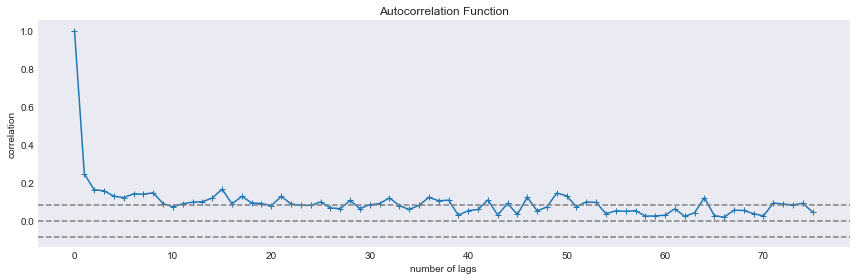

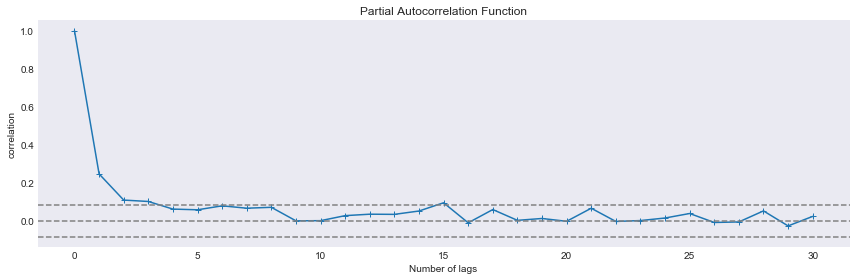

In [10]:
# MA
# calling auto correlation function
lag_acf = acf(x, nlags=75)
cutoff = 1.96 / np.sqrt(len(x))
acf_element = [i for i, val in enumerate(lag_acf) if val < cutoff][0]
# Plot PACF:
plt.figure(figsize=(12, 4))
plt.plot(lag_acf, marker='+')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-cutoff, linestyle='--', color='gray')
plt.axhline(y=cutoff, linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

# AR
# calling partial correlation function
lag_pacf = pacf(x, nlags=30, method='ols')
cutoff = 1.96 / np.sqrt(len(x))
pacf_element = [i for i, val in enumerate(lag_pacf) if val < cutoff][0]
# Plot PACF:
plt.figure(figsize=(12, 4))
plt.plot(lag_pacf, marker='+')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-cutoff, linestyle='--', color='gray')
plt.axhline(y=cutoff, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

print("ACF (MA) Element: %d, PACF (AR) Element: %d" % (acf_element, pacf_element))